In [13]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
mouse_drug_clin_trial_merge_df = pd.merge(clinical_trial_data_df, mouse_drug_data_df, on="Mouse ID", how="outer")

# Reduced combined data set to selected Drugs

drugs = ['Ceftamin', 'Naftisol', 'Propriva', 'Ramicane', 'Stelasyn','Zoniferol']
mouse_drug_clin_trial_merge_df_reduce = mouse_drug_clin_trial_merge_df[~mouse_drug_clin_trial_merge_df.Drug.isin(drugs)]
mouse_drug_clin_trial_merge_df_reduce

# Display the data table for preview

#mouse_drug_clin_trial_merge_df.sort_values("Timepoint").head()
mouse_drug_clin_trial_merge_df_reduce.sort_values("Timepoint").head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
244,k483,0,45.0,0,Infubinol
1278,i477,0,45.0,0,Placebo
1271,o302,0,45.0,0,Placebo
1838,g288,0,45.0,0,Capomulin


In [ ]:
# Data table for preview WITH SE

mouse_drug_clin_trial_merge_df_reduce.sort_values("Timepoint").head()

## Tumor Response to Treatment

In [17]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

mean_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
mean_tumor_volume = mean_tumor_vol_grouped_drug_TP["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

mean_tumor_vol_group_drug_TP_df = pd.DataFrame(mean_tumor_volume).reset_index()

# Preview DataFrame
mean_tumor_vol_group_drug_TP_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [18]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint WITH SELECTED DRUGS

mean_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df_reduce.groupby(["Drug", "Timepoint"])
mean_tumor_volume = mean_tumor_vol_grouped_drug_TP["Tumor Volume (mm3)"].mean()

# Convert to DataFrame

mean_tumor_vol_group_drug_TP_df = pd.DataFrame(mean_tumor_volume).reset_index()

# Preview DataFrame
mean_tumor_vol_group_drug_TP_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [8]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

sem_tumor_vol_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
sem_tumor_volume = sem_tumor_vol_grouped_drug_TP["Tumor Volume (mm3)"].sem()
sem_tumor_volume

# Convert to DataFrame

sem_tumor_vol_group_drug_TP_df = pd.DataFrame(sem_tumor_volume).reset_index()

# Preview DataFrame

sem_tumor_vol_group_drug_TP_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [9]:
# Minor Data Munging to Re-Format the Data Frames

tumor_vol_group_drug_TP_df_pivot = mean_tumor_vol_group_drug_TP_df.pivot_table(index='Timepoint', columns='Drug')

#tumor_vol_select_drugs = mouse_drug_clin_trial_merge_df.loc[:,["Capomulin","Infubinol", "Ketapril", "Placebo"]]

# Preview that Reformatting worked
tumor_vol_group_drug_TP_df_pivot

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

ValueError: x and y must have same first dimension, but have shapes (9,) and (100,)

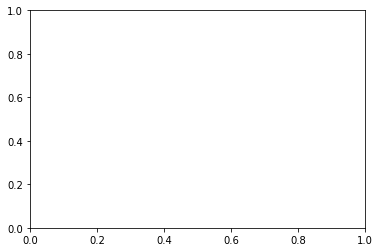

In [12]:
# Generate the Plot (with Error Bars)

#fig, ax = plt.subplots()

x_axis = np.arange(0, len('Timepoint'))

plt.plot(x_axis, mean_tumor_volume)
plt.legend(loc="best")


#ax.errorbar(x_axis, mean_tumor_volume, yerr=sem_tumor_volume, fmt="o")

plt.show()

# Save the Figure



In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_meta_sites_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
mean_meta_sites = mean_meta_sites_grouped_drug_TP["Metastatic Sites"].mean()

# Convert to DataFrame

mean_meta_sites_grouped_drug_TP_df = pd.DataFrame(mean_meta_sites).reset_index()

# Preview DataFrame
mean_meta_sites_grouped_drug_TP_df.head()

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sem_meta_sites_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
sem_meta_sites = sem_meta_sites_grouped_drug_TP["Tumor Volume (mm3)"].sem()
sem_meta_sites

# Convert to DataFrame

sem_meta_sites_grouped_drug_TP_df = pd.DataFrame(sem_meta_sites).reset_index()

# Preview DataFrame
sem_meta_sites_grouped_drug_TP_df.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

mean_meta_sites_group_drug_TP_df_pivot = mean_meta_sites_grouped_drug_TP_df.pivot_table(index='Timepoint', columns='Drug')

# Preview that Reformatting worked
mean_meta_sites_group_drug_TP_df_pivot

In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count_grouped_drug_TP = mouse_drug_clin_trial_merge_df.groupby(["Drug", "Timepoint"])
mouse_count = mouse_count_grouped_drug_TP["Mouse ID"].count()
#mouse_count

# Convert to DataFrame

mouse_count_df = pd.DataFrame(mouse_count).reset_index()

# Preview DataFrame
mouse_count_df

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

mouse_count_df_pivot = mouse_count_df.pivot_table(index='Timepoint', columns='Drug')

# Preview the Data Frame
mouse_count_df_pivot

In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)